In [42]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
from torch_geometric.nn import GCN, GIN, GAT
from model.MinAggGNN import MinAggGNN
import matplotlib.pyplot as plt

device = torch.device('cuda')

model = GCN(1, 8, 4, 2)
model.eval()
model.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


GCN(1, 2, num_layers=4)

In [43]:
from MINAR.ComputationGraph import ComputationGraph, Circuit
from model.CustomLosses import MultiplicativeLoss, JointLoss
import torch_geometric as pyg
import networkx as nx

G = ComputationGraph(model)
G.number_of_edges()

152

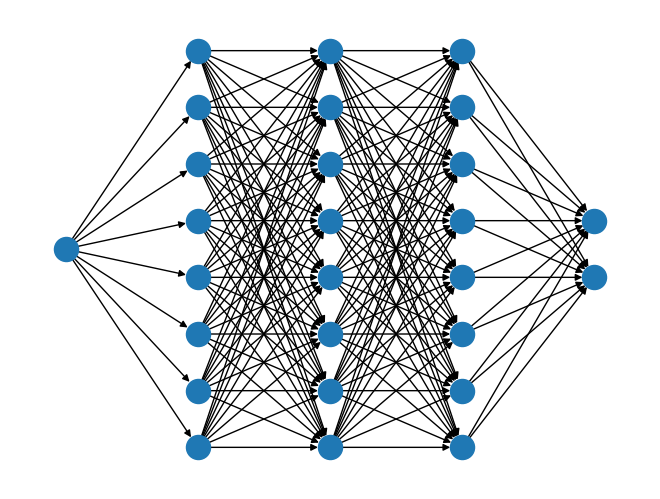

In [44]:
nx.draw(G, pos=nx.multipartite_layout(G, 'layer'))

In [45]:
from torch_geometric.data import Data

criterion = torch.nn.MSELoss()

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
x_corr = torch.tensor([[0], [0], [0]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index).to(device)
data_corr = Data(x=x_corr, edge_index=edge_index).to(device)

G.calculate_scores([data], [data_corr], criterion, which = 'weight_grad')
G.calculate_scores([data], [data_corr], criterion, which = 'EAP')
G.calculate_scores([data], [data_corr], criterion, which = 'EAP-IG', steps=20)

In [46]:
# which = 'weight'
# which = 'EAP'
which = 'EAP-IG'
K = 5
C = Circuit(model, G, K=K, key=which)
print(C.number_of_edges())

13


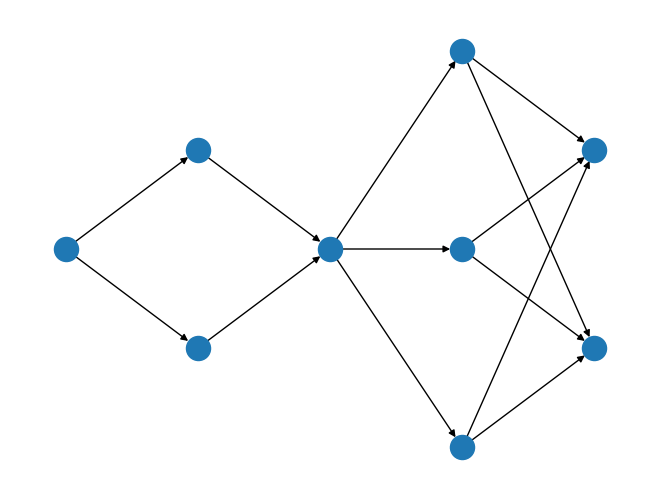

In [47]:
nx.draw(C, pos=nx.multipartite_layout(C, 'layer'))